# Analyzing Machine Learning Job Market Trends📈


# Business Understanding 

The main objective is to analyze the job trends for the Machine Learning Engineers data which have been extracted from the Naukri.com via the web_job_scaper.app.

> ***Key Goals :***
* 📊 Top Hiring Companies (Bar chart of job count per company).
* 📍 Top Locations for ML Jobs (Job count per city).
* 🔥Most In-Demand Skills (Word cloud).
                                               

# Data Understanding

Data is Extracted from the Naukri.com. Dataset contains the 60 job listings with featuring:

> ***Columns :***
* Job Title	
* Company Name 
* Location 
* Experience
* Salary
* Job Description
* Job Link 

## Loading & Describing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Loading and the excel file
file_path = r"D:\Machine_Learning_Project\Naukri_Scraping\data\Machine_Learning_Engineer_naukri_jobs_with_details.xlsx"
df = pd.read_excel(file_path)

# First few row
print("First Few Rows: ")
df.head()



First Few Rows: 


,Job Title,Company,Location,Experience,Salary,Skills,Job Description,Job Link
0,Machine Learning/Artificial Intelligence Engineer,Barclays,Pune,2-8 Yrs,Not Disclosed,"['Front end', 'XML', 'Postgresql', 'MySQL', 'M...",Join us as a Machine Learning/Artificial Intel...,https://www.naukri.com/job-listings-machine-le...
1,Machine Learning Engineer,Zycus Infotech,"Pune, Mumbai, Bengaluru",2-5 Yrs,Not Disclosed,"['Procurement', 'Version control', 'GIT', 'NoS...",We are seeking a highly skilled and motivated ...,https://www.naukri.com/job-listings-machine-le...
2,Machine Learning Engineer,Pairsoft Technologies,"Pune, Kolkata, Mumbai, New Delhi, Hyderabad, C...",3-7 Yrs,Not Disclosed,"['Career development', 'Automation', 'Networki...",MLOps Engineer\nLocation: [India]\nJob Type: F...,https://www.naukri.com/job-listings-machine-le...
3,Staff Machine Learning Engineer,Silicon Image India Research Development,Pune,2-6 Yrs,Not Disclosed,"['Timing closure', 'Simulation', 'Image proces...",There is energy here energy you can feel crack...,https://www.naukri.com/job-listings-staff-mach...
4,Machine Learning Engineer,Buzzworks Business Services,"Pune, Bengaluru",5-10 Yrs,20-35 Lacs P.A.,"['Artificial Intelligence', 'ML', 'Tensorflow'...","Dear Candidate,\n\nWarm greetings from Buzzwor...",https://www.naukri.com/job-listings-machine-le...


In [2]:
# Displaying the Last rows
print("Last Rows: ")
df.tail()

Last Rows: 


,Job Title,Company,Location,Experience,Salary,Skills,Job Description,Job Link
55,GenAI Engineer,Tech Mahindra,Pune,5-8 Yrs,Not Disclosed,"['GenAI', 'Agentic AI', 'Azure Open AI', 'Djan...","Design, develop, and deploy AI/ML models using...",https://www.naukri.com/job-listings-genai-engi...
56,"Data Scientist-Generative AI(LLMs,ML,Python) w...",Seventh Contact Hiring Solutions,Hybrid - Pune,2-4 Yrs,6-8 Lacs P.A.,"['Data Science', 'Api Integration', 'Machine L...","Design, develop, deploy GenAI apps to solve co...",https://www.naukri.com/job-listings-data-scien...
57,Data Scientist,Lentra Ai,Pune,3-8 Yrs,Not Disclosed,"['Computer science', 'Statistical analysis', '...",Responsibilities\nIdentifying and integrating ...,https://www.naukri.com/job-listings-data-scien...
58,Machine Learning Engineer / Sr. ML Engineer,Mysuru Consulting Group,"Pune, Kolkata, Mumbai, New Delhi, Hyderabad, C...",3-7 Yrs,Not Disclosed,"['Product management', 'Computer science', 'Da...",Design and develop machine learning algorithms...,https://www.naukri.com/job-listings-machine-le...
59,Senior Machine Learning Engineer,Silicon Image India Research Development,Pune,8-13 Yrs,Not Disclosed,"['C++', 'Image processing', 'Neural networks',...",There is energy here energy you can feel crack...,https://www.naukri.com/job-listings-senior-mac...


In [3]:
# Total Rows and Columns
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])
print("Columns: \n", df.columns)

Total Rows:  60
Total Columns:  8
Columns: 
 Index(['Job Title', 'Company', 'Location', 'Experience', 'Salary', 'Skills',
       'Job Description', 'Job Link'],
      dtype='object')


## Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        60 non-null     object
 1   Company          60 non-null     object
 2   Location         60 non-null     object
 3   Experience       60 non-null     object
 4   Salary           60 non-null     object
 5   Skills           60 non-null     object
 6   Job Description  60 non-null     object
 7   Job Link         60 non-null     object
dtypes: object(8)
memory usage: 3.9+ KB


## Data Exploration

In [5]:
# Checking the Missing Values
print("Missing Values per column: ")
print(df.isnull().sum())

Missing Values per column: 
Job Title          0
Company            0
Location           0
Experience         0
Salary             0
Skills             0
Job Description    0
Job Link           0
dtype: int64


In [6]:
# Checking the Duplicate Row
print("Duplicate Rows: ")
print(df.duplicated().sum())

Duplicate Rows: 
20


In [7]:
# Removing Duplicates
#Without subset, Pandas checks for duplicates across all columns
df.drop_duplicates(subset=["Job Title", "Company", "Location"], keep="first", inplace=True)

print("After Droping the Duplicates Rows are: ",df.shape[0])

After Droping the Duplicates Rows are:  39


In [8]:
# Convertingthe Job Titles
# Strip will remove the spaces at the & at the end of the string(job title)
df["Job Title"] = df["Job Title"].str.lower().str.strip()
df.head()

,Job Title,Company,Location,Experience,Salary,Skills,Job Description,Job Link
0,machine learning/artificial intelligence engineer,Barclays,Pune,2-8 Yrs,Not Disclosed,"['Front end', 'XML', 'Postgresql', 'MySQL', 'M...",Join us as a Machine Learning/Artificial Intel...,https://www.naukri.com/job-listings-machine-le...
1,machine learning engineer,Zycus Infotech,"Pune, Mumbai, Bengaluru",2-5 Yrs,Not Disclosed,"['Procurement', 'Version control', 'GIT', 'NoS...",We are seeking a highly skilled and motivated ...,https://www.naukri.com/job-listings-machine-le...
2,machine learning engineer,Pairsoft Technologies,"Pune, Kolkata, Mumbai, New Delhi, Hyderabad, C...",3-7 Yrs,Not Disclosed,"['Career development', 'Automation', 'Networki...",MLOps Engineer\nLocation: [India]\nJob Type: F...,https://www.naukri.com/job-listings-machine-le...
3,staff machine learning engineer,Silicon Image India Research Development,Pune,2-6 Yrs,Not Disclosed,"['Timing closure', 'Simulation', 'Image proces...",There is energy here energy you can feel crack...,https://www.naukri.com/job-listings-staff-mach...
4,machine learning engineer,Buzzworks Business Services,"Pune, Bengaluru",5-10 Yrs,20-35 Lacs P.A.,"['Artificial Intelligence', 'ML', 'Tensorflow'...","Dear Candidate,\n\nWarm greetings from Buzzwor...",https://www.naukri.com/job-listings-machine-le...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 59
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        39 non-null     object
 1   Company          39 non-null     object
 2   Location         39 non-null     object
 3   Experience       39 non-null     object
 4   Salary           39 non-null     object
 5   Skills           39 non-null     object
 6   Job Description  39 non-null     object
 7   Job Link         39 non-null     object
dtypes: object(8)
memory usage: 2.7+ KB


# Data Preparation 

<h2>Feature Engineering</h2>


<h3>📈 Min and Max experience</h3>

In [10]:
# Extracting min and max experience  in seorate columns
def extract_experience(exp):
    # exp is a list now
    exp = str(exp).replace(" Yrs","").split("-") # Removed the Yrs and split values
    #print(exp)
    min_exp = int(exp[0]) if len(exp)>0 else 0 # minimum exp
    max_exp = int(exp[1]) if len(exp) >1 else min_exp
    return min_exp, max_exp
    
df["Min_Experience"], df["Max_Experience"] = zip(*df["Experience"].apply(extract_experience))
df.head(2)

,Job Title,Company,Location,Experience,Salary,Skills,Job Description,Job Link,Min_Experience,Max_Experience
0,machine learning/artificial intelligence engineer,Barclays,Pune,2-8 Yrs,Not Disclosed,"['Front end', 'XML', 'Postgresql', 'MySQL', 'M...",Join us as a Machine Learning/Artificial Intel...,https://www.naukri.com/job-listings-machine-le...,2,8
1,machine learning engineer,Zycus Infotech,"Pune, Mumbai, Bengaluru",2-5 Yrs,Not Disclosed,"['Procurement', 'Version control', 'GIT', 'NoS...",We are seeking a highly skilled and motivated ...,https://www.naukri.com/job-listings-machine-le...,2,5


<function matplotlib.pyplot.show(close=None, block=None)>

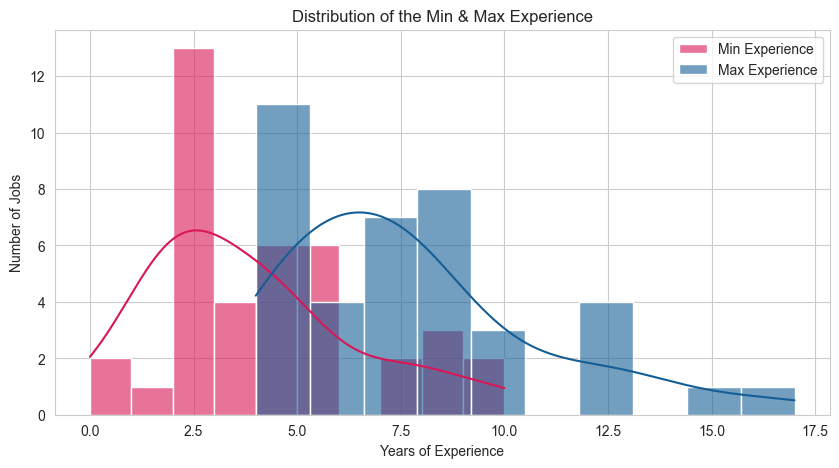

In [23]:
#Counting how many OCmpanies are hiring for each Max and Min experience
sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
sns.histplot(df["Min_Experience"], bins=10, kde= True, color= "#D91656", label = "Min Experience", alpha = 0.6)
sns.histplot(df["Max_Experience"], bins=10, kde= True, color="#155E95", label = "Max Experience", alpha = 0.6)
plt.xlabel("Years of Experience")
plt.ylabel("Number of Jobs")
plt.title("Distribution of the Min & Max Experience")
plt.legend()
plt.show


<h3>🌟 Most In-Demand Skills</h3>

In [13]:
#  COnverting skills from string to list
import ast

df["Skills"] = df["Skills"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

df.head(2)

,Job Title,Company,Location,Experience,Salary,Skills,Job Description,Job Link,Min_Experience,Max_Experience
0,machine learning/artificial intelligence engineer,Barclays,Pune,2-8 Yrs,Not Disclosed,"[Front end, XML, Postgresql, MySQL, Machine le...",Join us as a Machine Learning/Artificial Intel...,https://www.naukri.com/job-listings-machine-le...,2,8
1,machine learning engineer,Zycus Infotech,"Pune, Mumbai, Bengaluru",2-5 Yrs,Not Disclosed,"[Procurement, Version control, GIT, NoSQL, Mac...",We are seeking a highly skilled and motivated ...,https://www.naukri.com/job-listings-machine-le...,2,5


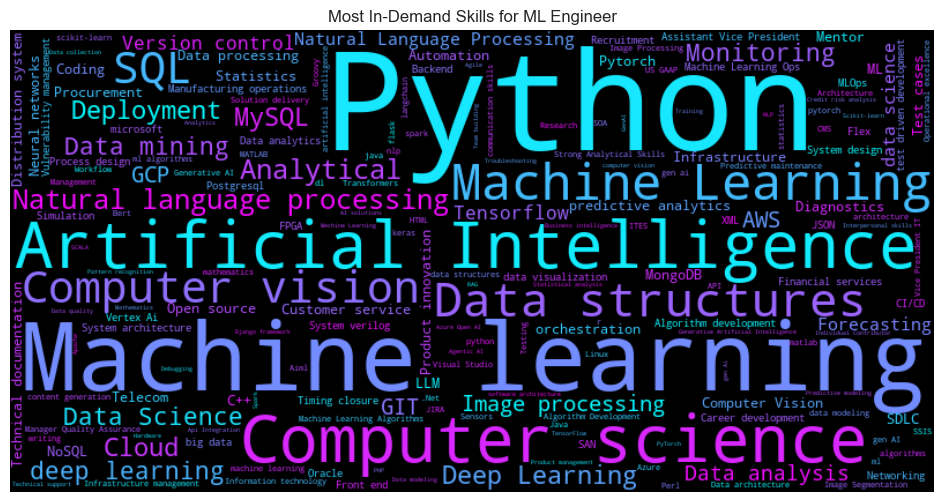

In [44]:
from collections import Counter
from wordcloud import WordCloud

# Flatten List
all_skills= [skill for sublist in df["Skills"] for skill in sublist]  # loop through each row which is list of skill & extracts each individual skill from that list
skills_counts = Counter(all_skills) 
wordcloud = WordCloud(width = 800, height = 400, background_color = "black", colormap="cool").generate_from_frequencies(skills_counts)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most In-Demand Skills for ML Engineer")
plt.show()


<h3>📍 Top Locations </h3>

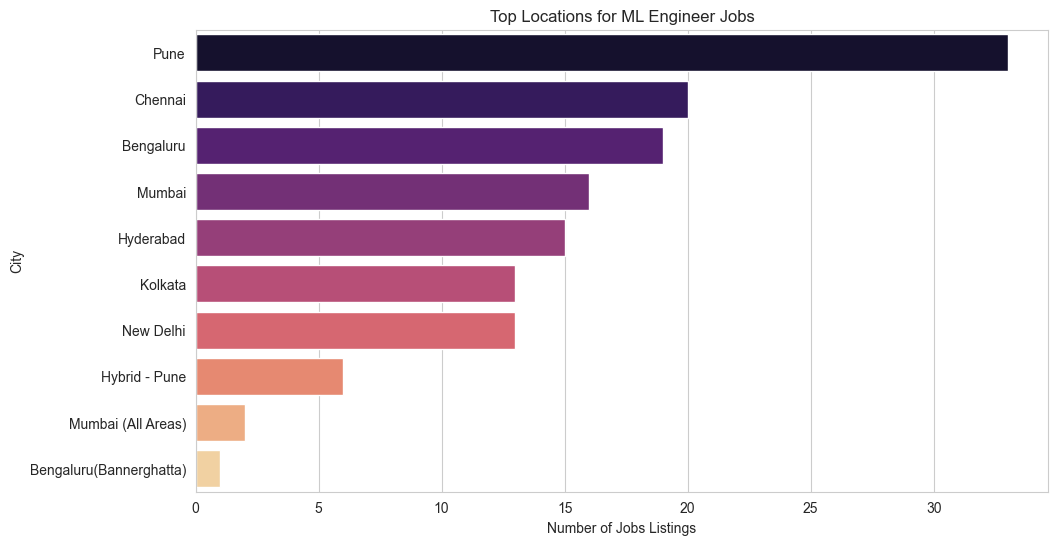

In [56]:
# Flatten the location

all_locations = [city.strip() for sublist in df["Location"].dropna().str.split(",") for city in sublist]
loc_counts = Counter(all_locations) # Counting each occurence of the city
loc_df = pd.DataFrame(loc_counts.items(), columns=["City", "Job Count"]).sort_values(by="Job Count", ascending = False)

# Plotting
plt.figure(figsize = (11,6))
sns.barplot(x= "Job Count", y="City", data = loc_df.head(15), palette="magma")
plt.xlabel("Number of Jobs Listings")
plt.ylabel("City")
plt.title("Top Locations for ML Engineer Jobs")
plt.show()


<h3>👜 Top Hiring Companies</h3>


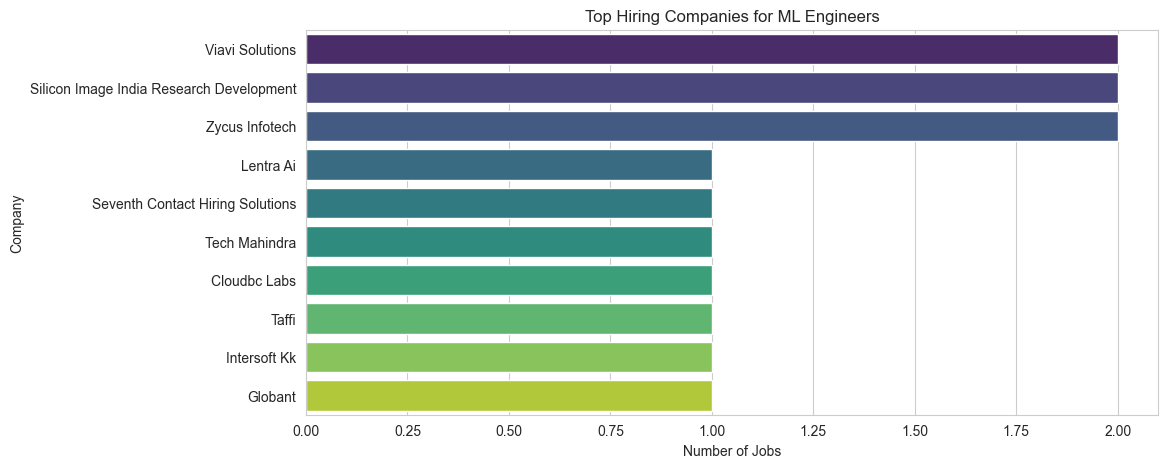

In [55]:
plt.figure(figsize=(11,5))
top_companies = df["Company"].value_counts().head(10)  # Top 10 companies hiring
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")
plt.xlabel("Number of Jobs")
plt.ylabel("Company")
plt.title("Top Hiring Companies for ML Engineers")
plt.show()


# Conclusion

This project file aimed to analyze Machine Learning Engineer job postings which is scraped from Naukri.com by applying data preprocessing and feature engineering techniques.
